In [25]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
%pylab inline
plt.style.available

Populating the interactive namespace from numpy and matplotlib


[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

['TP', 'FP', 'FN', 'time_pt', 'rel_thr', 'training', 'file_no']
seaborn-poster


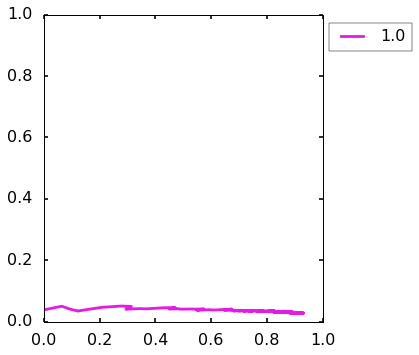

In [26]:
path = '/Users/martin/Pictures/Live_mdf/'
csvPath = path+"out/"
X={}

with open(csvPath+'outputData.csv', 'rb') as csvfile:
    spamreader = csv.reader(csvfile,  dialect='excel')
    for row in spamreader:
        if row[0]=='TP':
            print row
            pass
        else:
            row=[float(x) for x in row]
            TPFPFN=np.array(row[0:3])
            tpt = row[3]
            thr = row[4]
            training = row[5]
            fileno = row[6]
            repeats = row[7]
            #print row[0:3]
            #decide order (average over all but first two dimesion later)
            ref = [training,thr,tpt,fileno,repeats]
            if ref[0] not in X:
                X[ref[0]]={}
            if ref[1] not in X[ref[0]]:
                X[ref[0]][ref[1]]={}
            if ref[2] not in X[ref[0]][ref[1]]:
                X[ref[0]][ref[1]][ref[2]]={}
            if ref[3] not in X[ref[0]][ref[1]][ref[2]]:
                X[ref[0]][ref[1]][ref[2]][ref[3]]={}
            if row[7] not in X[ref[0]][ref[1]][ref[2]][ref[3]]:
                X[ref[0]][ref[1]][ref[2]][ref[3]][ref[4]]=TPFPFN
    #go through and average over various groups
st_counter=14
styles=plt.style.available
plt.style.use(styles[st_counter])
#matplotlib.rcParams['lines.markersize']=10
print(styles[st_counter])
st_counter+=1

figure(figsize=(5,5.5))
training_keys=sort(X.keys())
color=(0.9,0.1,0.1)
col_count=float(10)
for training in training_keys:
    col_count=col_count-1
    if training >1000:
        break
    P=[]
    R=[]
    thr_keys=sort(X[training].keys())
    
    for thr in thr_keys[::1]:
        count=0
        acc=np.zeros((3))
        for x1 in X[training][thr]:
            if x1==0 or x1==14:
                pass
            else:
                for x2 in X[training][thr][x1]:
                    for x3 in X[training][thr][x1][x2]:
                        #if x1>4:
                            acc+=X[training][thr][x1][x2][x3]
                            count+=1
        acc=acc/count
        X[training][thr]=acc
        TP=acc[0]
        FP=acc[1]
        TN=acc[2]
        precision=TP/(TP+FP)
        recall=TP/(TP+TN)
        P.append(precision)
        R.append(recall)
    #print (P,R)
    color=tuple([col_count/10,color[1],col_count/10])
    h = plot(R, P,'x-',color=color)
    #print str(training)
    h[0].set_label(str(training))
    #legend(str(training))
    axis((0,1,0,1))
    legend(bbox_to_anchor=(1.35, 1.00))
savefig(path+'figure.png',bbox_inches='tight')
    


In [27]:
with open(path+"random_reference.pickle",'wb') as r_file:
    pickle.dump([R,P],r_file)

In [19]:
help(pickle.dump)

Help on built-in function dump in module cPickle:

dump(...)
    dump(obj, file, protocol=0) -- Write an object in pickle format to the given file.
    
    See the Pickler docstring for the meaning of optional argument proto.



In [49]:
thr_keys

NameError: name 'thr_keys' is not defined

In [34]:
help(legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Places a legend on the axes.
    
    To make a legend for lines which already exist on the axes
    (via plot for instance), simply call this function with an iterable
    of strings, one for each legend item. For example::
    
        ax.plot([1, 2, 3])
        ax.legend(['A simple line'])
    
    However, in order to keep the "label" and the legend element
    instance together, it is preferable to specify the label either at
    artist creation, or by calling the
    :meth:`~matplotlib.artist.Artist.set_label` method on the artist::
    
        line, = ax.plot([1, 2, 3], label='Inline label')
        # Overwrite the label by calling the method.
        line.set_label('Label via method')
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    selection by defining a label starting with an underscore.
    This is default for all artists, so calling :meth:`leg